## Setup

In [1]:
!pip install numpy pandas
!pip install -U scikit-learn
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 622.6 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


# Setting up and Exploring our Data

In [1]:
from sklearn import datasets

# load breast cancer tumor classification dataset
data, data_y = datasets.load_breast_cancer(as_frame=True, return_X_y=True)

data["target"] = data_y

In [2]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
data["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

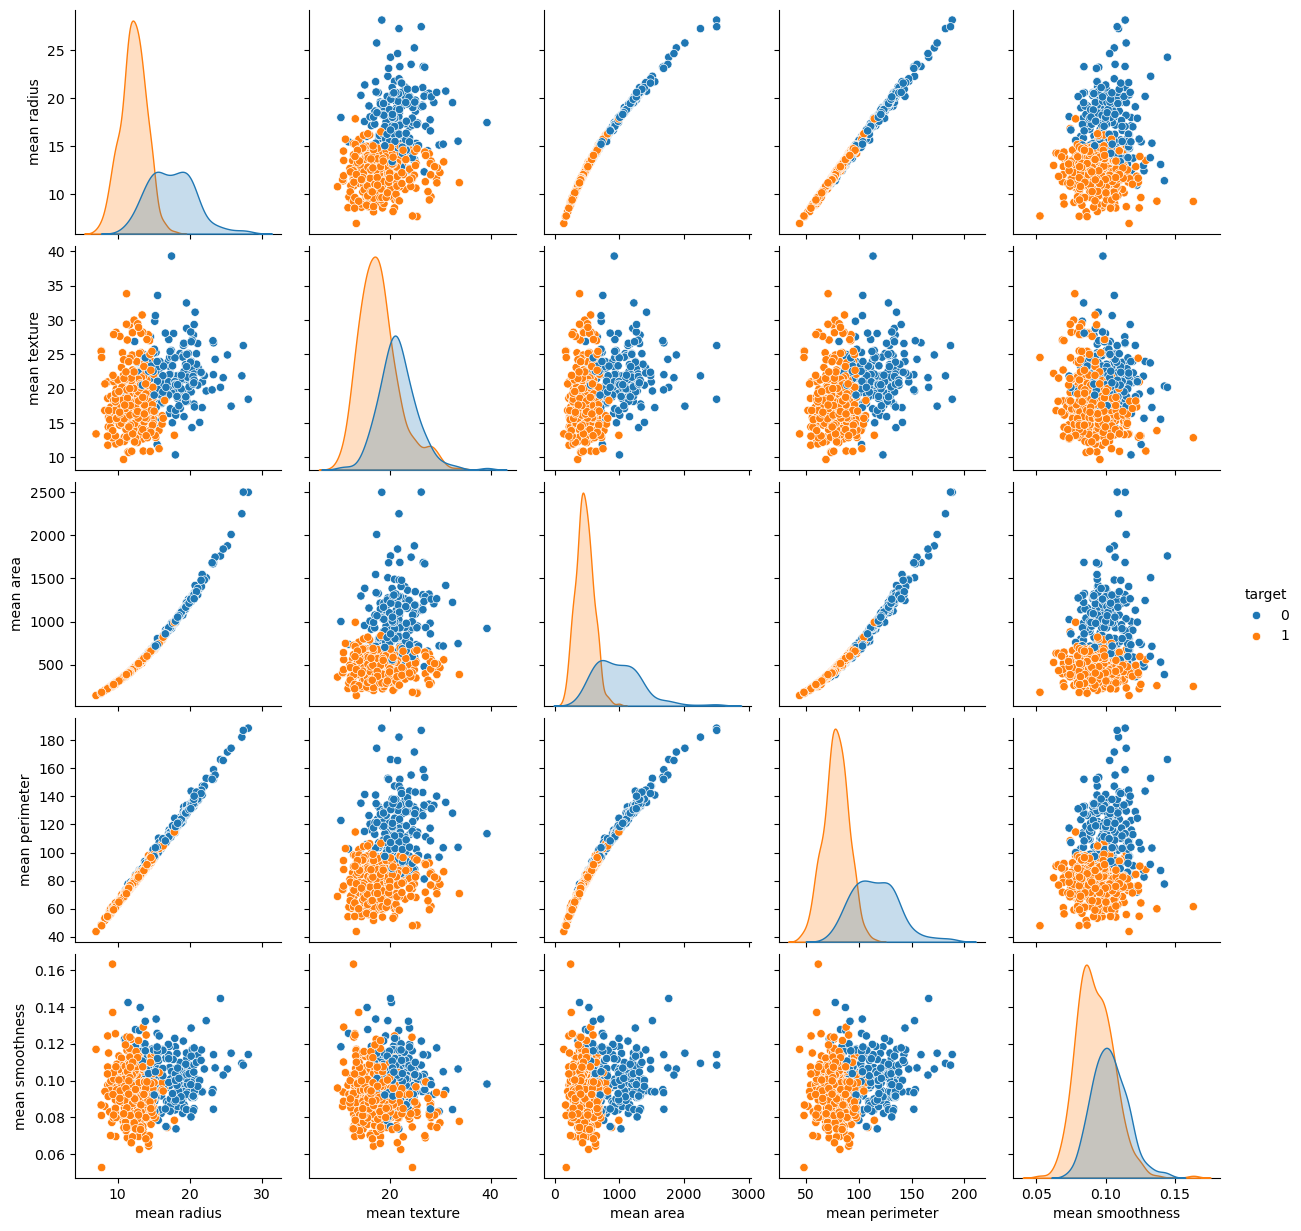

In [5]:
import seaborn as sns

sns.pairplot(data ,hue = 'target', vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

<Axes: >

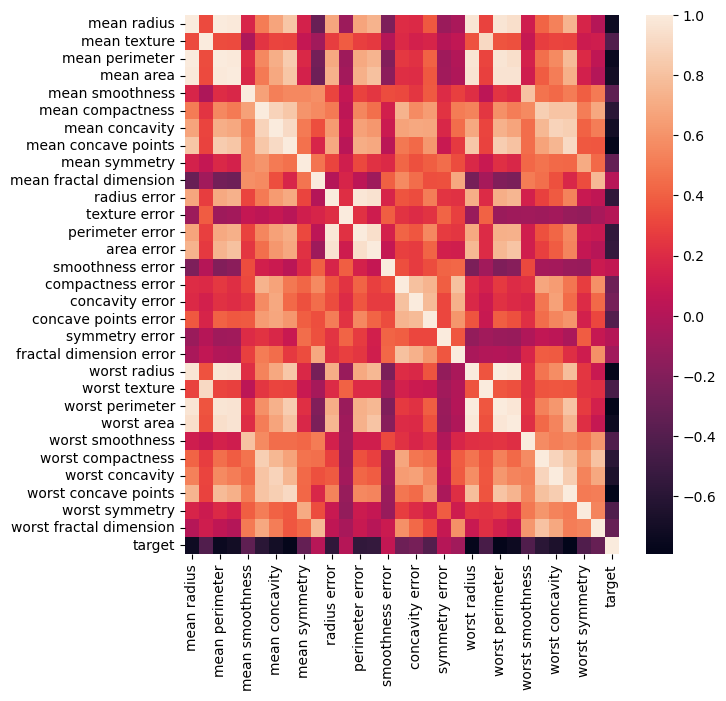

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
sns.heatmap(data.corr())

# Prepping our Data for Training

In [16]:
# separate the target output and the features in the data

X = data.drop(["target"], axis=1)
y = data["target"]

In [17]:
# check our size
y.shape

(569,)

In [25]:
from sklearn.model_selection import train_test_split

# split our data into training and test sets

# split for 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# checking datset lengths
print("train: ", len(y_train))
print("test: ", len(y_test))

train:  455
test:  114


In [28]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
318,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,0.2330,0.08743,...,10.06,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.11450,0.3135,0.10550
239,17.460,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,0.1809,0.05966,...,22.51,44.87,141.20,1408.0,0.1365,0.3735,0.3241,0.20660,0.2853,0.08496
193,12.340,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,...,15.65,39.34,101.70,768.9,0.1785,0.4706,0.4425,0.14590,0.3215,0.12050
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.3630,0.12260,0.3175,0.09772


# Building Our Support Vector Classifier Model

In [29]:
# importing the model class and some metric functions
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
# define our support vector machine

# we will set our kernel to linear, because our pair plot showed that a lot of the classes are overlapping but separable, correlation shows negative linear
# we will use a higher C value to account for overlaps in data (higher C means lower margin)
svm = SVC(C=0.7, kernel="linear")

In [50]:
# fitting our model to the data
svm.fit(X_train, y_train)

SVC(C=0.7, kernel='linear')

## Evaluating Our Model

In [51]:
y_predict = svm.predict(X_test)
y_predict

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1])

In [52]:
# create a confusion matrix to show misclassifications

cm = confusion_matrix(y_test, y_predict)

<Axes: >

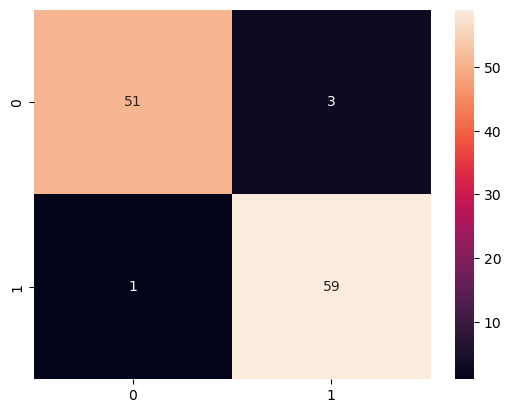

In [53]:
sns.heatmap(cm, annot=True)

In [54]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.95      0.98      0.97        60

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

